In [72]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set();

In [40]:
df = pd.read_excel("../data/coalpublic2013.xls", header=2, index_col='MSHA ID')

In [41]:
df.head()

,Year,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [44]:
df['Company Type'].unique()

array(['Independent Producer Operator', 'Operating Subsidiary',
       'Contractor'], dtype=object)

In [43]:
df['Company Type'].replace(to_replace='Indepedent Producer Operator',value='Independent Producer Operator', inplace=True).head()

AttributeError: 'NoneType' object has no attribute 'head'

In [45]:
df['Company Type'].head

<bound method NDFrame.head of MSHA ID
103381     Independent Producer Operator
103404     Independent Producer Operator
100759     Independent Producer Operator
103246     Independent Producer Operator
103451     Independent Producer Operator
103433     Independent Producer Operator
100329              Operating Subsidiary
100851              Operating Subsidiary
102901     Independent Producer Operator
102901     Independent Producer Operator
103180     Independent Producer Operator
103182              Operating Subsidiary
103285              Operating Subsidiary
103332     Independent Producer Operator
103375     Independent Producer Operator
103419     Independent Producer Operator
103432     Independent Producer Operator
103437     Independent Producer Operator
102976     Independent Producer Operator
102976     Independent Producer Operator
103380     Independent Producer Operator
103380     Independent Producer Operator
103422     Independent Producer Operator
103467     Independ

In [46]:
df.rename(columns=lambda x: x.replace(" ","_"), inplace=True)

In [47]:
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [48]:
len(df)

1450

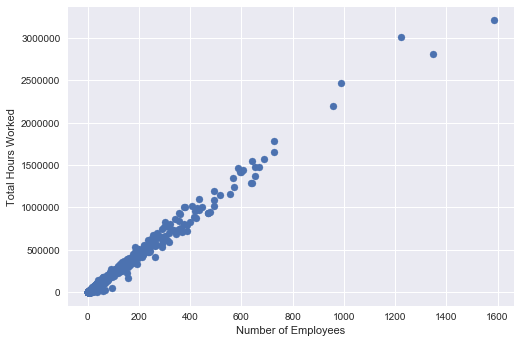

In [50]:
plt.scatter(df.Average_Employees,df.Labor_Hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked")

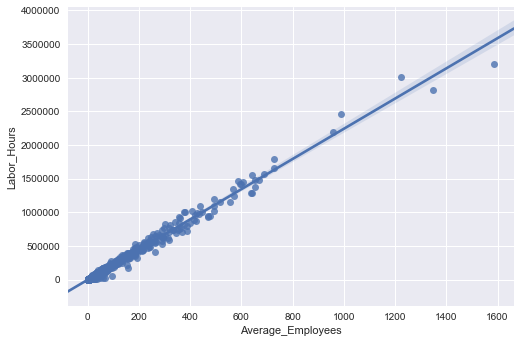

In [53]:
sns.regplot(df.Average_Employees,df.Labor_Hours)
plt.savefig("../figures/2015-11-21"+"-employees_vs_hours.png")

In [57]:
for column in df.columns:
    print(column)

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours


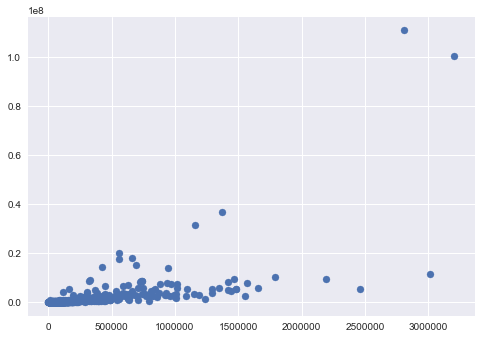

In [58]:
plt.scatter(df.Labor_Hours,df['Production_(short_tons)'])

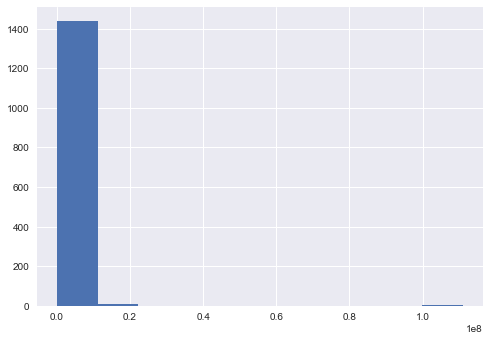

In [59]:
df['Production_(short_tons)'].hist()

In [68]:
df = df[df['Production_(short_tons)'] >0]

In [69]:
len(df)

1061

In [73]:
df['log_production'] = np.log(df['Production_(short_tons)'])

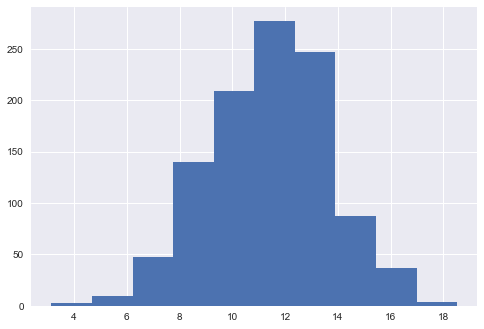

In [74]:
df.log_production.hist()

In [75]:
df.to_csv("../data/cleaned_coalpublic2013.csv")